# Lab3-Convolutional Neural Network

### Import TensorFlow

In [32]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt

In [33]:
def solve_cudnn_error():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Currently, memory growth needs to be the same across GPUs
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        except RuntimeError as e:
            # Memory growth must be set before GPUs have been initialized# Memory growth must be set before GPUs have been initialized
            print(e)
solve_cudnn_error()

1 Physical GPUs, 1 Logical GPUs


### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

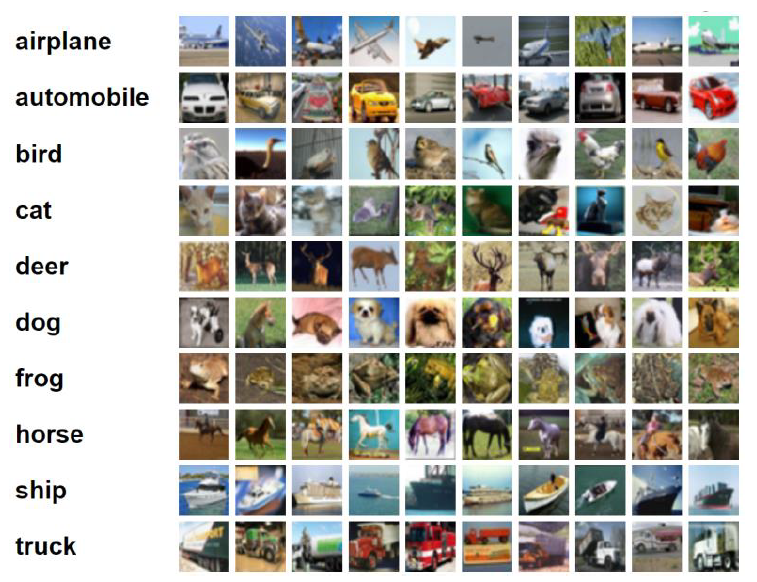

In [34]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

169009152/169001437 [==============================] - 19s 0us/step


### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.


### Create the convolutional base

In [36]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(100))

Let's display the architecture of our model so far.

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 4.2815 - accuracy: 0.0501 - val_loss: 3.5315 - val_accuracy: 0.1651
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 3.3631 - accuracy: 0.1906 - val_loss: 3.1317 - val_accuracy: 0.2409
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.9863 - accuracy: 0.2606 - val_loss: 2.9224 - val_accuracy: 0.2844
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.7811 - accuracy: 0.3005 - val_loss: 2.7927 - val_accuracy: 0.3072
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.6066 - accuracy: 0.3362 - val_loss: 2.7064 - val_accuracy: 0.3249
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.4770 - accuracy: 0.3611 - val_loss: 2.6628 - val_accuracy: 0.3322
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3977 - accuracy: 0.3798 - val_loss: 2.6476 - val_accuracy:

### Evaluate the model

313/313 - 1s - loss: 2.6002 - accuracy: 0.3591


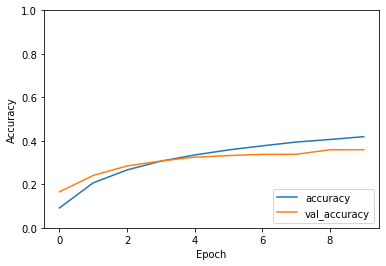

In [41]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [42]:
for L in model.layers:
    print(L.name)

conv2d_3
max_pooling2d_2
conv2d_4
max_pooling2d_3
conv2d_5
flatten_1
dense_2
dense_3


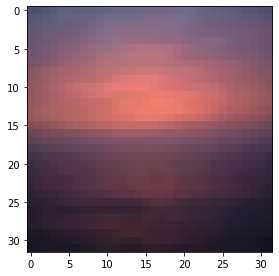

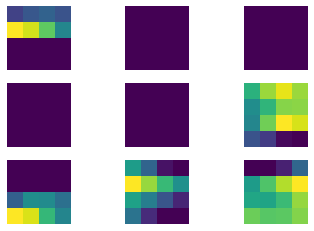

In [52]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model



layer_outputs = [layer.output for layer in model.layers if 'conv2d_5' in layer.name]

activation_model = Model(inputs=model.input, outputs=layer_outputs)
intermediate_activations = activation_model.predict(test_images[4].reshape(-1,32,32,3))

first_layer_activation = intermediate_activations[0]
fig , ax = plt.subplots()
#fig.subplots_adjust(hspace=0, wspace=0)
fig.tight_layout()
plt.imshow(test_images[4],cmap=plt.cm.binary)
plt.show()
for i in range(0,9,1):
    plt.subplot(3,3,i+1)
    plt.imshow(first_layer_activation[ :, :, i], cmap='viridis')
    #fig.subplots_adjust(hspace=0, wspace=0 )
    plt.axis('off')
    #plt.show()
fig.tight_layout()